# <font color=darkblue>Week 7 Assignment </font>

## Full name: 
## R#: 
## Title of the notebook:
## Date: 

![](https://xylomeet.com/wp-content/uploads/2020/06/meet-for-finance.gif) <br>


___
### The "AirQuality" dataset is provided from BigML.com available @ http://bml.io/ZzMj8k. These data give air pollution and related values for 41 U.S. cities and were collected from U.S. government publications. The data are means over the years 1969-1971. Here the columns and some information about them:

> City: City <br>
  SO2: Sulfur dioxide content of air in micrograms per cubic meter <br>
  Enterprises: Number of manufacturing enterprises employing 20 or more workers <br>
  Population: Population size in thousands from the 1970 census <br>
  Wind speed: Average annual wind speed in miles per hour <br>
  Rain Days: Average number of days with precipitation per year <br>

__1. Read the "AirQuality.csv" file as a dataframe and check its first few rows.__<br>


In [43]:
# Let's import the necessary libraries:
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt 


In [44]:
AQ = pd.read_csv("AirQuality.csv")         #Read the .csv file a data frame
AQ.head()

,City,SO2,Enterprises,Population,Wind speed,Rain days
0,Phoenix,10,213,582,60,36
1,Little Rock,13,91,132,82,100
2,San Francisco,12,453,716,87,67
3,Denver,17,454,515,90,86
4,Hartford,56,412,158,90,127


___
__2. Use descriptive functions of the Pandas library and explain the format of the dataframe__<br>


In [45]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
City           41 non-null object
SO2            41 non-null int64
Enterprises    41 non-null int64
Population     41 non-null int64
Wind speed     41 non-null int64
Rain days      41 non-null int64
dtypes: int64(5), object(1)
memory usage: 2.0+ KB


In [46]:
AQ.describe()

,SO2,Enterprises,Population,Wind speed,Rain days
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.048780,463.097561,608.609756,94.439024,113.902439
std,23.472272,563.473948,579.113023,14.286442,26.506419
min,8.000000,35.000000,71.000000,60.000000,36.000000
25%,13.000000,181.000000,299.000000,87.000000,103.000000
50%,26.000000,347.000000,515.000000,93.000000,115.000000
75%,35.000000,462.000000,717.000000,106.000000,128.000000
max,110.000000,3344.000000,3369.000000,127.000000,166.000000


___
__3. Compute the arithmetic and harmonic mean of 'SO2'.__<br>


In [47]:
SO2 = AQ['SO2']
# Use the mean function from the statistics library
mean = statistics.mean(SO2)
print("The arithmetic mean SO2  is ",round(mean,2),"micrograms per cubic meter")
hmean = statistics.harmonic_mean(SO2)
print("The harmonic mean SO2 is ",round(hmean,2),"micrograms per cubic meter")

The arithmetic mean SO2  is  30.05 micrograms per cubic meter
The harmonic mean SO2 is  18.85 micrograms per cubic meter


___
__4. Find the median, range, and IQR of 'Population'.__<br>



In [48]:
Pop = AQ['Population']
# Use the median function from the statistics library
median = statistics.median(Pop)
print("The median of Population is ",median,"people")

The median of Population is  515 people


In [49]:
Range = np.ptp(Pop) #ptp stands for Peak To Peak
print("The range of Population is ",Range)

The range of Population is  3298


C:\Users\Farha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
IQR = scipy.stats.iqr(Pop)
print("The IQR of Population is ",IQR)

The IQR of Population is  418.0


___
__5. Find the 10th,40th, and 70th percentile of 'Wind speed'.__<br>


In [51]:
WS = AQ['Wind speed']
p104070 = np.percentile(WS, [10,40,70]) #returns the 10th, 40th and 70th percentile
print(p104070)

[ 79.  90. 101.]


___
__6. Provide a 5-number summary of 'Rain days'. Plot one box plot with outliers and one without outliers. Interpret it in your own words__<br>


In [52]:
RD = AQ['Rain days']
RD.describe()

count     41.000000
mean     113.902439
std       26.506419
min       36.000000
25%      103.000000
50%      115.000000
75%      128.000000
max      166.000000
Name: Rain days, dtype: float64

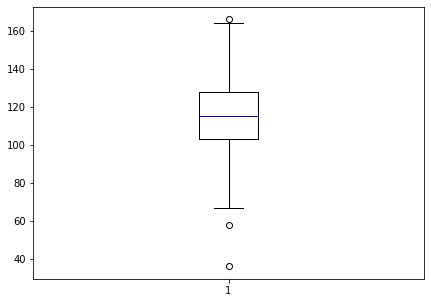

In [53]:
fig = plt.figure(figsize =(7, 5))
plt.boxplot(RD,medianprops={'linewidth': 1, 'color': 'blue'},showfliers=True)

plt.show()

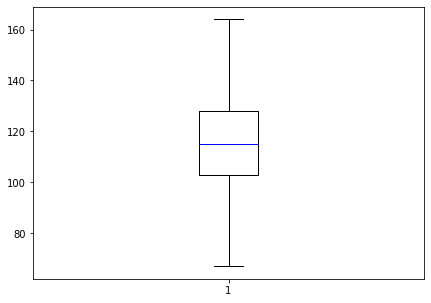

In [54]:
fig = plt.figure(figsize =(7, 5))
plt.boxplot(RD,medianprops={'linewidth': 1, 'color': 'blue'},showfliers=False)

plt.show()

___
__7. Find the variance and standard deviation of 'Enterprises'.__<br>


In [55]:
Enterprises = AQ['Enterprises']
var = statistics.variance(Enterprises)
sd = statistics.stdev(Enterprises)
print("The variance and standard deviation of number of Enterprises is ",round(var,2)," and ",round(sd,2)," respectively")

The variance and standard deviation of number of Enterprises is  317502.89  and  563.47  respectively


___
__8. Find the skewness and kurtosis 'Wind speed'.__<br>

In [56]:
skew = scipy.stats.skew(WS)
kurtosis = scipy.stats.kurtosis(WS)
print("The skewness and kurtosis of Wind Speed is ",round(skew,2)," and ",round(kurtosis,2)," respectively")

The skewness and kurtosis of Wind Speed is  0.0  and  0.22  respectively


___
__9. Create a a line plot of SO2 vs City.__<br>

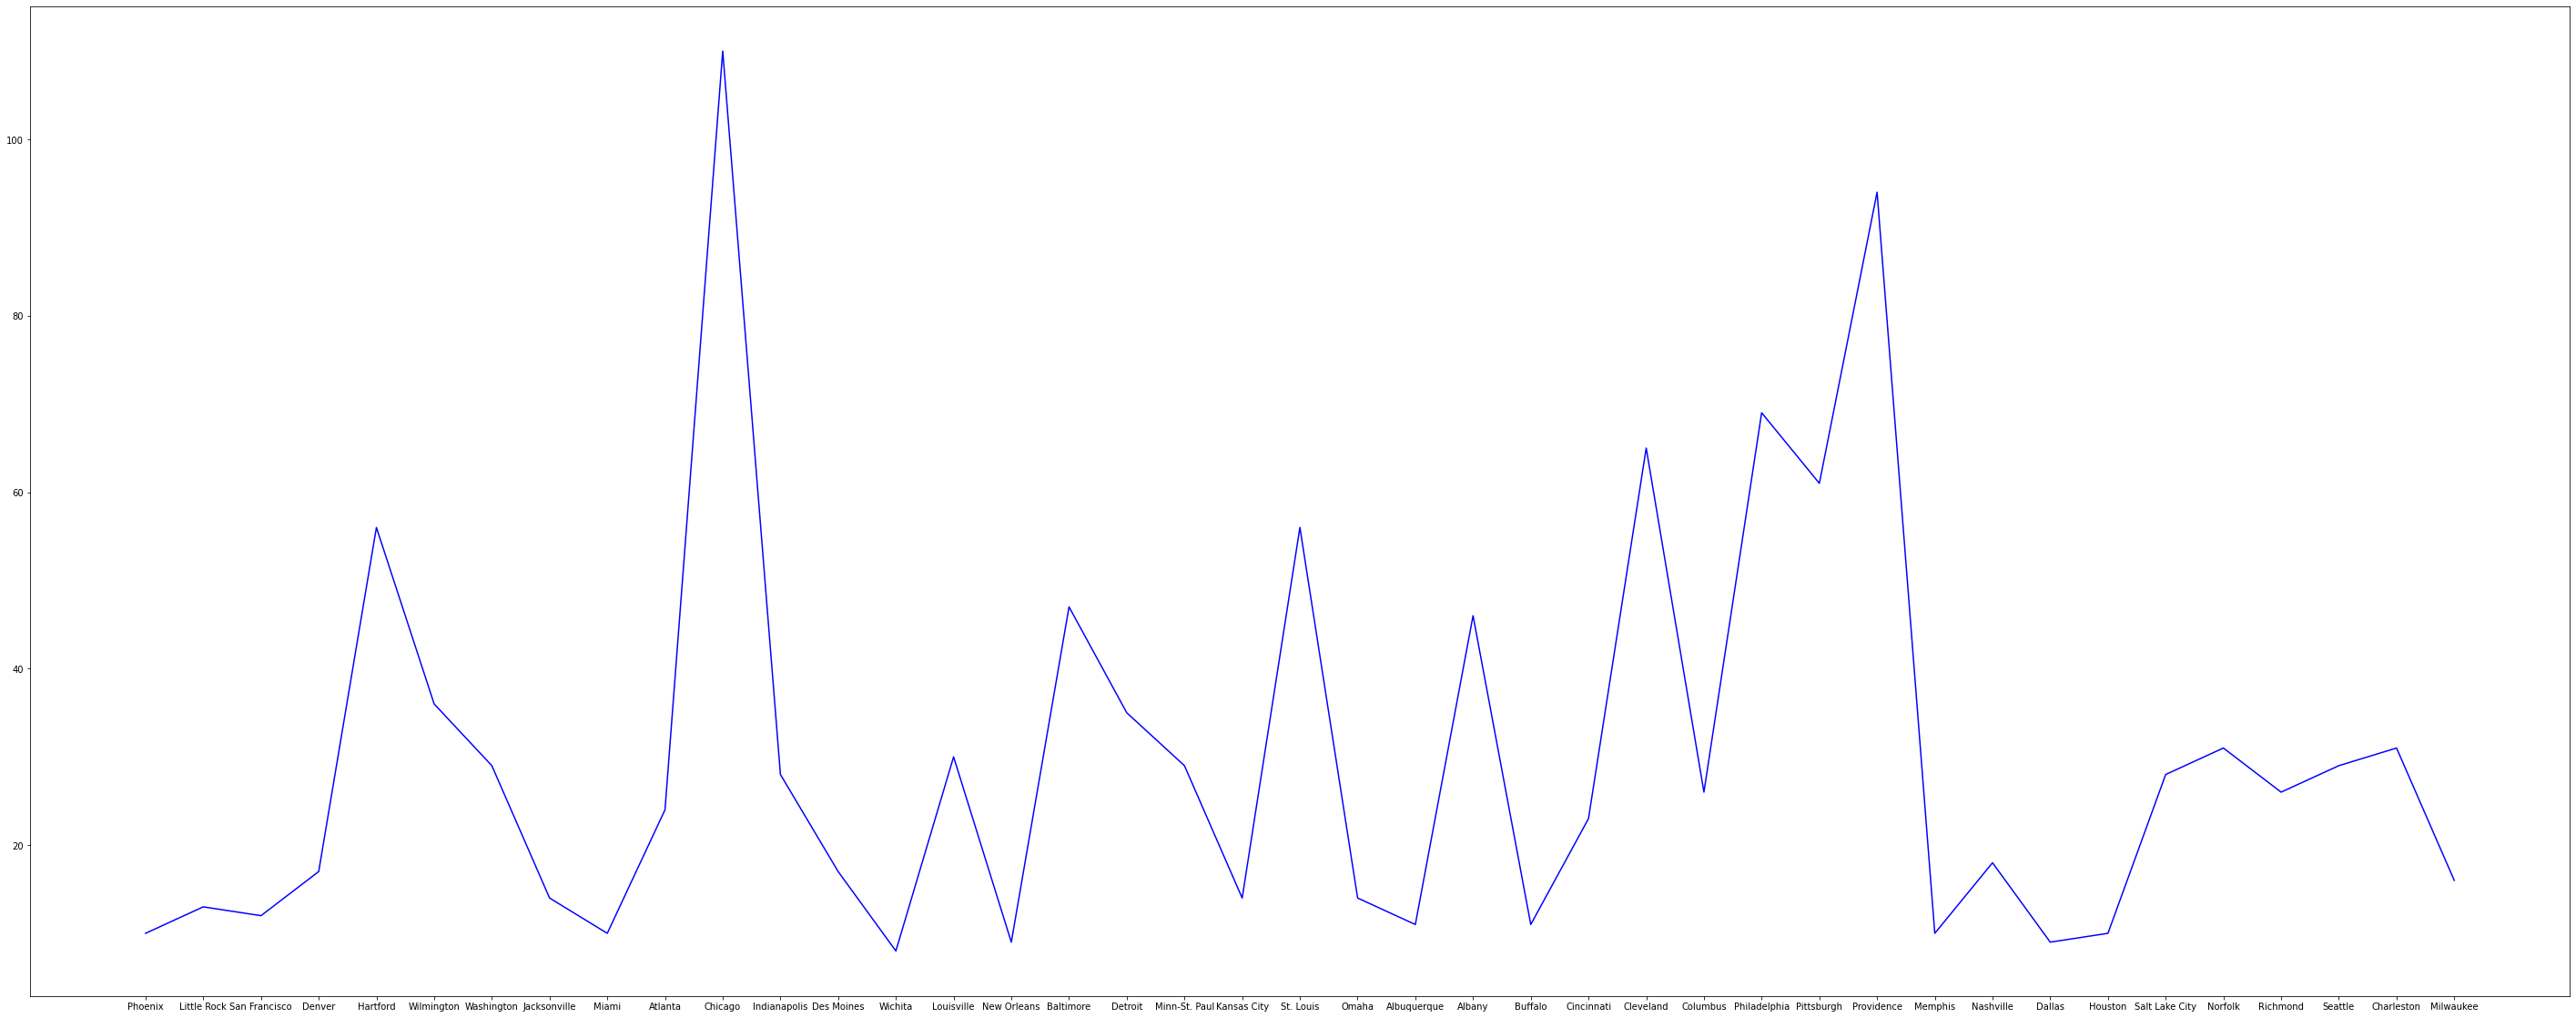

In [57]:
city = AQ['City']

# Plot here
myfigure = plt.figure(figsize = (50,20)) # generate an object from the figure class, set aspect ratio

plt.plot(city,SO2, color ='blue')

___
__10. Using the Weibull plotting position formula, plot an empirical CDF for "Wind speed".__<br>

In [58]:
# Weibull Plotting Position Function
WS = np.array(WS)
WS.sort()
# built a relative frequency approximation to probability, assume each pick is equally likely
weibull_pp = []
for i in range(0,len(WS),1):
    weibull_pp.append((i+1)/(len(WS)+1))

In [59]:
print(WS)

[ 60  65  71  76  79  82  83  84  86  87  87  88  88  89  90  90  90  90
  91  92  93  94  94  95  96  96  97 100 101 104 106 106 106 108 109 109
 109 112 118 124 127]


In [60]:
print(weibull_pp)

[0.023809523809523808, 0.047619047619047616, 0.07142857142857142, 0.09523809523809523, 0.11904761904761904, 0.14285714285714285, 0.16666666666666666, 0.19047619047619047, 0.21428571428571427, 0.23809523809523808, 0.2619047619047619, 0.2857142857142857, 0.30952380952380953, 0.3333333333333333, 0.35714285714285715, 0.38095238095238093, 0.40476190476190477, 0.42857142857142855, 0.4523809523809524, 0.47619047619047616, 0.5, 0.5238095238095238, 0.5476190476190477, 0.5714285714285714, 0.5952380952380952, 0.6190476190476191, 0.6428571428571429, 0.6666666666666666, 0.6904761904761905, 0.7142857142857143, 0.7380952380952381, 0.7619047619047619, 0.7857142857142857, 0.8095238095238095, 0.8333333333333334, 0.8571428571428571, 0.8809523809523809, 0.9047619047619048, 0.9285714285714286, 0.9523809523809523, 0.9761904761904762]


___
__11. Fit the normal, log-normal, and Gumbell EV1 functions and visually assess the goodness-of-fit.__<br>

In [61]:
# Normal Quantile Function
import math

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

In [62]:
mu = WS.mean() # Fitted Model
sigma = WS.std()
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(WS) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 


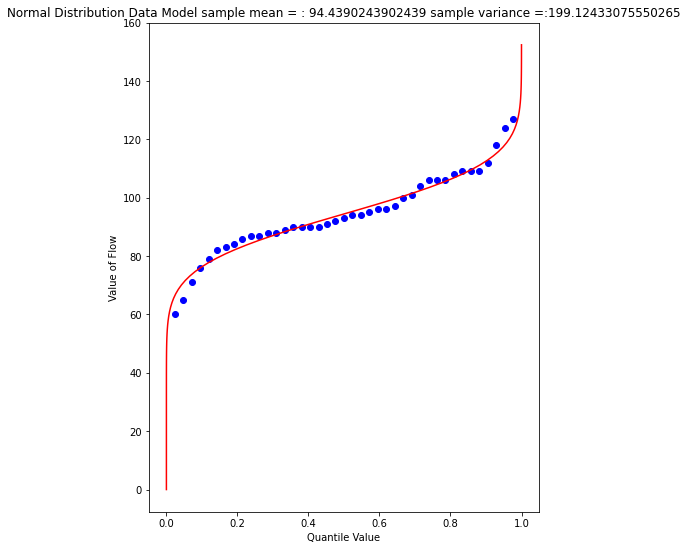

In [63]:
# Fitting Data to Normal Data Model 
# Now plot the sample values and plotting position
myfigure = plt.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
plt.scatter(weibull_pp, WS ,color ='blue') 
plt.plot(ycdf, x, color ='red') 
plt.xlabel("Quantile Value") 
plt.ylabel("Value of Flow") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(mu)+ " sample variance =:" + str(sigma**2)
plt.title(mytitle) 
plt.show()

In [64]:
# Log-Normal Quantile Function
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

WSl = AQ['Wind speed'].apply(loggit).tolist()
WSl_mean = np.array(WSl).mean()
WSl_variance = np.array(WSl).std()**2
WSl.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability
for i in range(0,len(WSl),1):
    weibull_pp.append((i+1)/(len(WSl)+1))
################
mu = WSl_mean # Fitted Model in Log Space
sigma = math.sqrt(WSl_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(WSl) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

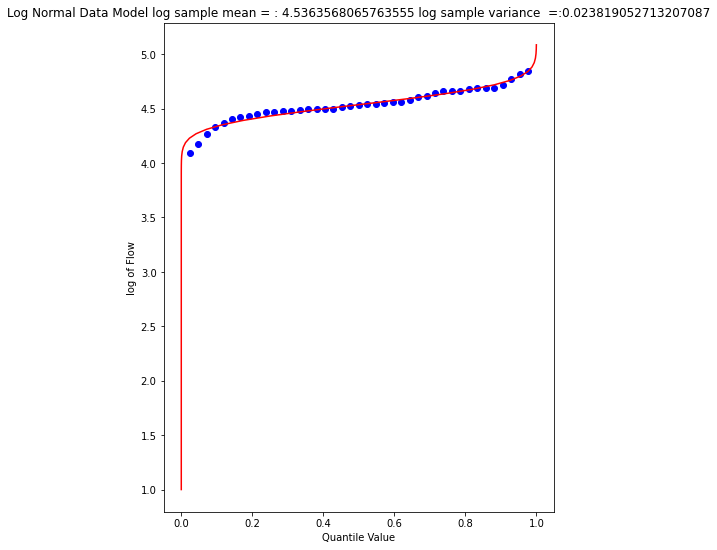

In [65]:
# Fitting Data to Log-Normal Data Model
# Now plot the sample values and plotting position
myfigure = plt.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
plt.scatter(weibull_pp, WSl ,color ='blue') 
plt.plot(ycdf, x, color ='red') 
plt.xlabel("Quantile Value") 
plt.ylabel("log of Flow") 
mytitle = "Log Normal Data Model log sample mean = : " + str(WSl_mean)+ " log sample variance  =:" + str(WSl_variance)
plt.title(mytitle) 
plt.show()

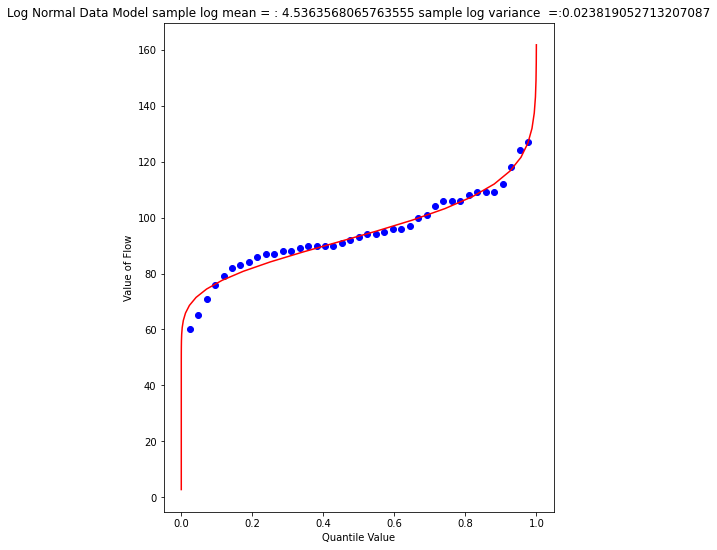

In [66]:
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

################
mu = WSl_mean # Fitted Model in Log Space
sigma = math.sqrt(WSl_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(WSl) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = plt.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
plt.scatter(weibull_pp, WS ,color ='blue') 
plt.plot(ycdf, x, color ='red') 
plt.xlabel("Quantile Value") 
plt.ylabel("Value of Flow") 
mytitle = "Log Normal Data Model sample log mean = : " + str((WSl_mean))+ " sample log variance  =:" + str((WSl_variance))
plt.title(mytitle) 
plt.show()

In [67]:
# Gumbell EV1 Quantile Function
def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

WS_mean = np.array(WS).mean()
WS_variance = np.array(WS).std()**2
alpha_mom = WS_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(WS_variance)*0.45
WS.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability
for i in range(0,len(WS),1):
    weibull_pp.append((i+1)/(len(WS)+1))
################
mu = WS_mean # Fitted Model
sigma = math.sqrt(WS_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(WS) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 

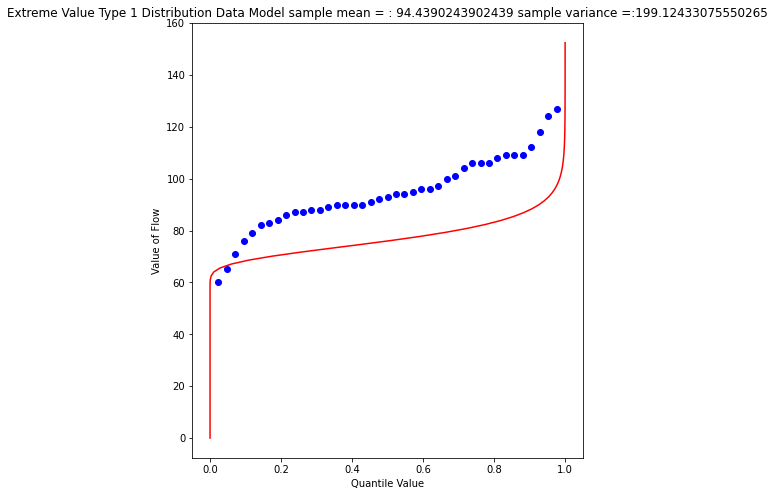

In [68]:
# Fitting Data to Gumbell EV1 Data Model 
# Now plot the sample values and plotting position
myfigure = plt.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
plt.scatter(weibull_pp, WS ,color ='blue') 
plt.plot(ycdf, x, color ='red') 
plt.xlabel("Quantile Value") 
plt.ylabel("Value of Flow") 
mytitle = "Extreme Value Type 1 Distribution Data Model sample mean = : " + str(WS_mean)+ " sample variance =:" + str(WS_variance)
plt.title(mytitle) 
plt.show()

___
__12. Use the best fit from last step and fill the table below__<br>

|Exceedence Probability|Wind Speed|Remarks|
|:---|:---|:---|
|25% |????| 75% chance of greater value|           
|50% |????| 50% chance of greater value|            
|75% |????| 25% chance of greater value|            
|90% |????| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|????| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|????| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

In [69]:
from scipy.optimize import newton

myguess = 100
def f(x):
    mu = WS.mean()
    sigma = WS.std()
    quantile = 0.25
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))

#############################
def f(x):
    mu = WS.mean()
    sigma = WS.std()
    quantile = 0.50
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = WS.mean()
    sigma = WS.std()
    quantile = 0.75
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = WS.mean()
    sigma = WS.std()
    quantile = 0.90
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = WS.mean()
    sigma = WS.std()
    quantile = 0.99
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = WS.mean()
    sigma = WS.std()
    quantile = 0.998
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))
#############################
def f(x):
    mu = WS.mean()
    sigma = WS.std()
    quantile = 0.999
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))
print(normdist(newton(f, myguess),mu,sigma))

84.92120369483325
0.24999999999999983
94.43902439024389
0.4999999999999996
103.95684508565455
0.7500000000000002
112.52318061238118
0.8999999999999997
127.2664497645118
0.99
135.05317361510367
0.998
138.04573151769884
0.9990000000000001


|Exceedence Probability|Wind Speed|Remarks|
|:---|:---|:---|
|25% |84.92| 75% chance of greater value|           
|50% |94.44| 50% chance of greater value|            
|75% |103.96| 25% chance of greater value|            
|90% |112.52| 10% chance of greater value|
|99% |127.27| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|135.05| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|138.05| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

![](https://freight.cargo.site/w/1200/i/c96b2ce17b2aee95c6e837552e3e38d058ac4ad2a6759448ed78128963790744/Happy_Coding_BC_6-03-05.png)